In [25]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import datetime
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn
import math
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
df = pd.read_csv('BITCOIN_PRICES_LAST_5_YEARS.csv', usecols=('Date', 'Close', 'Volume', 'Market Cap'))

In [27]:
df.head()

,Date,Close,Volume,Market Cap
0,Jul-03-2017,2567.00,885058338.0,4.145427e+10
1,Jul-04-2017,2602.27,984523239.6,4.266123e+10
2,Jul-05-2017,2602.12,940907729.2,4.232427e+10
3,Jul-06-2017,2610.60,855108846.7,4.276730e+10
4,Jul-07-2017,2520.75,795842916.7,4.203889e+10


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1825 non-null   object 
 1   Close       1825 non-null   float64
 2   Volume      1825 non-null   float64
 3   Market Cap  1825 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.2+ KB


In [29]:
df_close = df[['Date','Close']].copy()

In [30]:
df_close['Date'] = pd.to_datetime(df_close['Date'])

In [31]:
df_close.set_index('Date')

,Close
Date,
2017-07-03,2567.00000
2017-07-04,2602.27000
2017-07-05,2602.12000
2017-07-06,2610.60000
2017-07-07,2520.75000
...,...
2022-06-27,20732.98340
2022-06-28,20293.45080
2022-06-29,20101.12000


In [32]:
df_close['roll_avg_7']   = df_close['Close'].rolling(window=7).mean()
df_close['roll_avg_30']  = df_close['Close'].rolling(window=30).mean()
df_close['roll_avg_365'] = df_close['Close'].rolling(window=365).mean()

In [33]:
df_close['roll_avg_30'] = df_close.rolling(window=30).mean()

In [34]:
df_close.head(30)

,Date,Close,roll_avg_7,roll_avg_30,roll_avg_365
0,2017-07-03,2567.00,NaN,NaN,NaN
1,2017-07-04,2602.27,NaN,NaN,NaN
2,2017-07-05,2602.12,NaN,NaN,NaN
3,2017-07-06,2610.60,NaN,NaN,NaN
4,2017-07-07,2520.75,NaN,NaN,NaN
5,2017-07-08,2567.87,NaN,NaN,NaN
6,2017-07-09,2517.59,2569.742857,NaN,NaN
7,2017-07-10,2366.40,2541.085714,NaN,NaN
8,2017-07-11,2340.78,2503.730000,NaN,NaN
9,2017-07-12,2399.01,2474.714286,NaN,NaN


In [35]:
df_close

,Date,Close,roll_avg_7,roll_avg_30,roll_avg_365
0,2017-07-03,2567.00000,NaN,NaN,NaN
1,2017-07-04,2602.27000,NaN,NaN,NaN
2,2017-07-05,2602.12000,NaN,NaN,NaN
3,2017-07-06,2610.60000,NaN,NaN,NaN
4,2017-07-07,2520.75000,NaN,NaN,NaN
...,...,...,...,...,...
1820,2022-06-27,20732.98340,20904.695550,25480.316181,43076.425555
1821,2022-06-28,20293.45080,20840.910894,25175.240404,43037.670297
1822,2022-06-29,20101.12000,20858.777524,24787.943421,42994.549019
1823,2022-06-30,19816.74636,20679.002890,24386.740487,42952.785505


In [36]:
df_close = df_close.set_index('Date')

In [37]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2017-07-03 to 2022-07-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1825 non-null   float64
 1   roll_avg_7    1819 non-null   float64
 2   roll_avg_30   1796 non-null   float64
 3   roll_avg_365  1461 non-null   float64
dtypes: float64(4)
memory usage: 71.3 KB


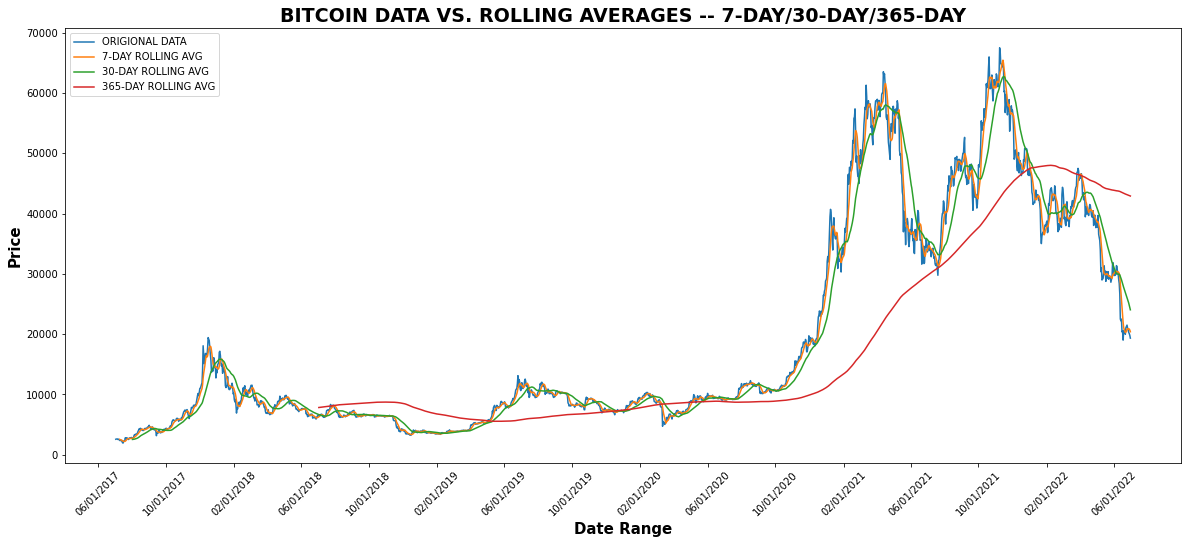

In [38]:
#Plotting the 7-day rolling average against the origional data

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
# plt.title("SCATTERPLOT OF DATA VS. ROLLING AVERAGE")
# plt.xlabel("Year-Month")
# plt.ylabel("Average Price")

# #s=20 to keep dots small in size
# plt.scatter(df_close.index, df_close['Close'], s=20)
# plt.scatter(df_close.index[7:], df_close['roll_avg'][7:], s=20);
# plt.figure(figsize=(20, 4))

# date_form = DateFormatter("%m/%d/%y")
# ax.xaxis.set_major_formatter(date_form)

ax.set_title("BITCOIN DATA VS. ROLLING AVERAGES -- 7-DAY/30-DAY/365-DAY", fontweight="bold", fontsize=19)
ax.plot(df_close.index,df_close['Close'], label='ORIGIONAL DATA')
ax.plot(df_close.index[7:], df_close['roll_avg_7'][7:], label='7-DAY ROLLING AVG');
ax.plot(df_close.index[30:], df_close['roll_avg_30'][30:], label='30-DAY ROLLING AVG');
ax.plot(df_close.index[365:], df_close['roll_avg_365'][365:], label='365-DAY ROLLING AVG');

ax.set_xlabel('Date Range', fontweight="bold", fontsize=15)
ax.set_ylabel("Price", fontweight="bold",  fontsize=15)
ax.legend( loc='upper left')
# ax.set_xticks(df_close.index).set_major_locator(mdates.WeekdayLocator(interval=60))

date_form = DateFormatter("%m/%d/%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.xticks(rotation = 45)

plt.show()

In [39]:
decomposition = seasonal_decompose(df_close['Close'], model='additive', period=7)
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [40]:
register_matplotlib_converters()

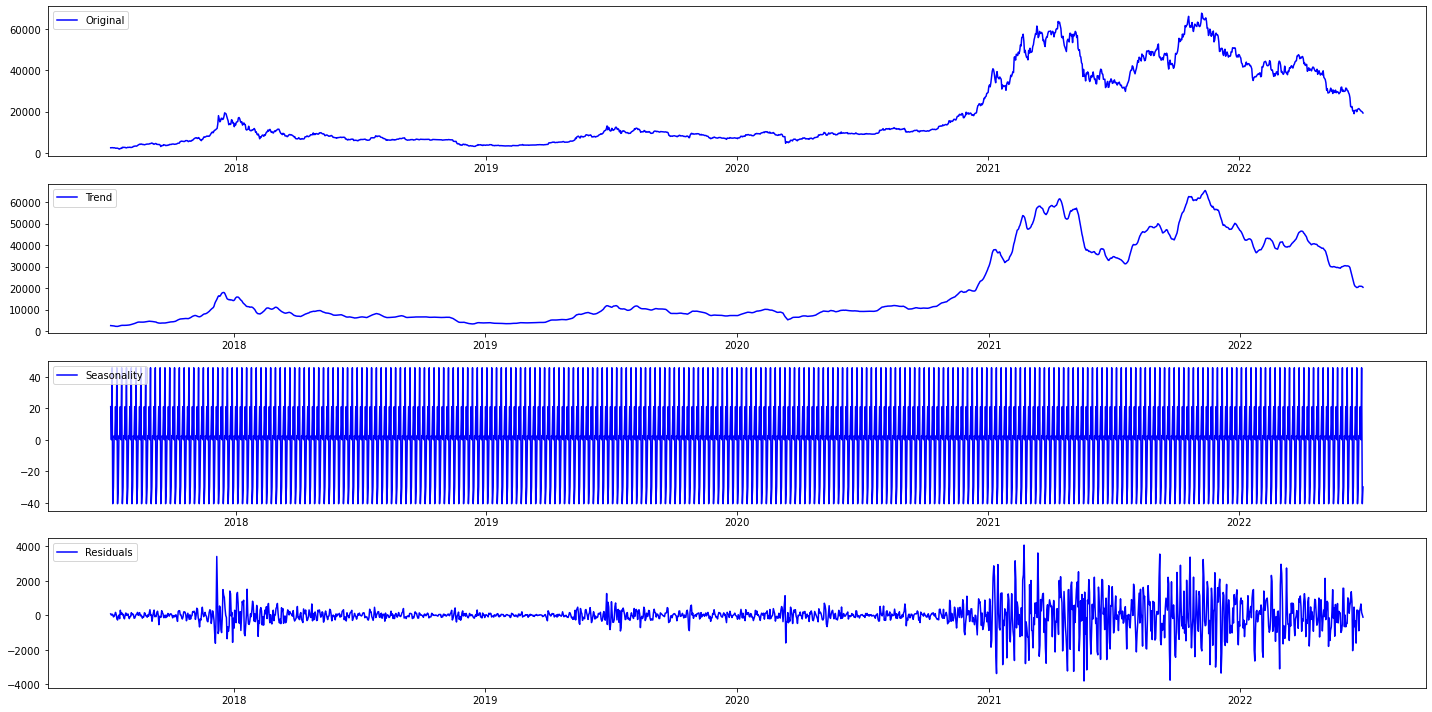

In [41]:


plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(observed, label='Original', color="blue")
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='upper left')
plt.tight_layout()



In [42]:
# Initial test
dftest = adfuller(df_close['Close'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print()
print(dfoutput)

(-1.4952179640128793, 0.5358756034063683, 24, 1800, {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}, 30000.242253585377)

Test Statistic                   -1.495218
p-value                           0.535876
#Lags Used                       24.000000
Number of Observations Used    1800.000000
Critical Value (1%)              -3.433988
Critical Value (5%)              -2.863147
Critical Value (10%)             -2.567626
dtype: float64


In [43]:
df_close['Close_diff'] = df_close['Close'] - df_close['Close'].shift(1)

In [44]:
dftest = adfuller(df_close['Close_diff'].dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print()
print(dfoutput)

(-8.157819273442051, 9.316689840404205e-13, 23, 1800, {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}, 29984.841046578116)

Test Statistic                -8.157819e+00
p-value                        9.316690e-13
#Lags Used                     2.300000e+01
Number of Observations Used    1.800000e+03
Critical Value (1%)           -3.433988e+00
Critical Value (5%)           -2.863147e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


## Test statistic after differencing by 1 shows very low p value.

1. If p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    - If p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
2. If the Test Statistic is lower than the critical values, then reject the null hypothesis. Data does not have a unity root and is stationary
    Therefore after differencing, data is stationary. Now we can do ARMA

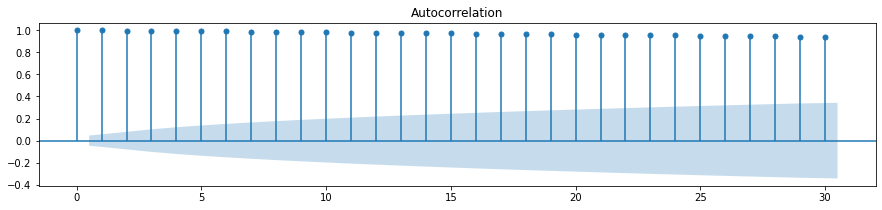

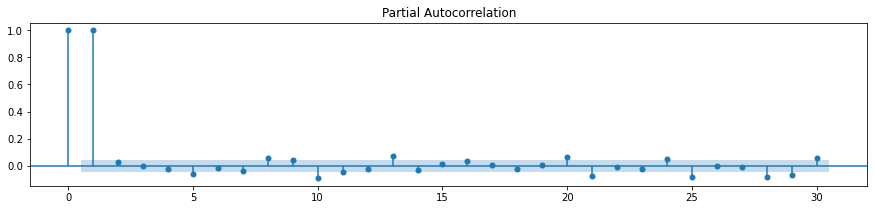

In [45]:
# ACF AND PACF

rcParams['figure.figsize'] = 15, 3
plot_acf(df_close['Close'].dropna(), lags=30, alpha=0.05);

rcParams['figure.figsize'] = 15, 3
plot_pacf(df_close['Close'].dropna(), lags=30, alpha=0.05);

In [87]:


# Instantiate & fit model with statsmodels
#p = num lags - ACF
p = 8

# q = lagged forecast errors - PACF
q = 8

#d = number of differences - will compare differenced data RMSE with this model to see if that is better prediction
# d=


# Fitting ARMA model and summary
ar = ARMA(df_close['Close'], (p,q), freq='D').fit()
ar.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     ARMA(8, 8)   Log Likelihood              -15180.250
Method:                       css-mle   S.D. of innovations            988.263
Date:                Sun, 03 Jul 2022   AIC                          30396.500
Time:                        21:31:52   BIC                          30495.668
Sample:                    07-03-2017   HQIC                         30433.081
                         - 07-01-2022                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.902e+04   8434.788      2.255      0.024    2484.711    3.55e+04
ar.L1.Close     0.7129      0.033     21.442      0.000       0.648       0.778
ar.L2.Close    -0.0097        nan        nan        nan         nan         nan
ar.L3.Close    -0.3220        nan        nan        nan         nan         nan
ar.L4.Close     1.2462        nan        nan        nan         nan         nan
ar.L5.Close    -0.3289      0.028    -11.807      0.000      -0.384      -0.274
ar.L6.Close    -0.0962        nan        nan        nan         nan         nan
ar.L7.Close     0.6606      0.027     24.120      0.000       0.607       0.714
ar.L8.Close    -0.8636        nan        nan        nan         nan         nan
ma.L1.Close     0.2686      0.041      6.564      0.000       0.188       0.349
ma.L2.Close     0.3205        nan        nan        nan         nan         nan
ma.L3.Close     0.6217        nan        nan        nan         nan         nan
ma.L4.Close    -0.6027      0.047    -12.956      0.000      -0.694      -0.512
ma.L5.Close    -0.2330      0.045     -5.234      0.000      -0.320      -0.146
ma.L6.Close    -0.1967        nan        nan        nan         nan         nan
ma.L7.Close    -0.8789        nan        nan        nan         nan         nan
ma.L8.Close    -0.0297        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9744           -0.2742j            1.0122           -0.4563
AR.2           -0.9744           +0.2742j            1.0122            0.4563
AR.3           -0.0858           -1.0111j            1.0147           -0.2635
AR.4           -0.0858           +1.0111j            1.0147            0.2635
AR.5            0.4313           -0.9418j            1.0358           -0.1817
AR.6            0.4313           +0.9418j            1.0358            0.1817
AR.7            1.0038           -0.0000j            1.0038           -0.0000
AR.8            1.0190           -0.0000j            1.0190           -0.0000
MA.1            1.0294           -0.0000j            1.0294           -0.0000
MA.2            0.4484           -0.9274j            1.0301           -0.1783
MA.3            0.4484           +0.9274j            1.0301            0.1783
MA.4           -0.0857           -0.9964j            1.0001           -0.2637
MA.5           -0.0857           +0.9964j            1.0001            0.2637
MA.6           -0.9860           -0.2773j            1.0243           -0.4564
MA.7           -0.9860           +0.2773j            1.0243            0.4564
MA.8          -29.3690           -0.0000j           29.3690           -0.5000
-----------------------------------------------------------------------------
"""

<Figure size 1440x648 with 0 Axes>

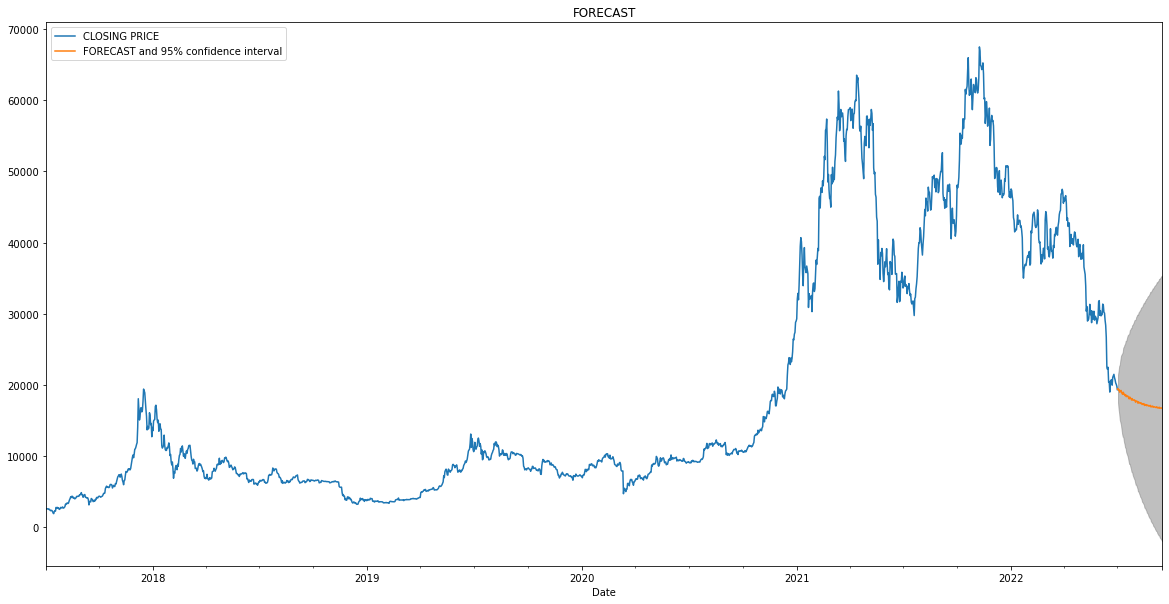

In [88]:
#plot of ARMA model
plt.figure(figsize=(20,9))
fig, ax = plt.subplots()
# ax = df_price_date['SALE_PRICE_LOGGED'].plot(ax=ax, title='FORECAST')
ax = df_close['Close'].plot(ax=ax, title='FORECAST',figsize=(20,10))
fig = ar.plot_predict(1824, 1900, dynamic=True, ax=ax, plot_insample=True)

handles, labels = ax.get_legend_handles_labels()
labels = ['CLOSING PRICE', 'FORECAST and 95% confidence interval']
ax.legend(handles, labels)

plt.show()

In [48]:
df_volume = df[['Date','Volume']].copy()
df_volume['Date'] = pd.to_datetime(df_volume['Date'])
df_volume = df_volume.set_index('Date')

In [49]:
df_volume['roll_avg_7']   = df_volume['Volume'].rolling(window=7).mean()
df_volume['roll_avg_30']  = df_volume['Volume'].rolling(window=30).mean()
df_volume['roll_avg_365'] = df_volume['Volume'].rolling(window=365).mean()

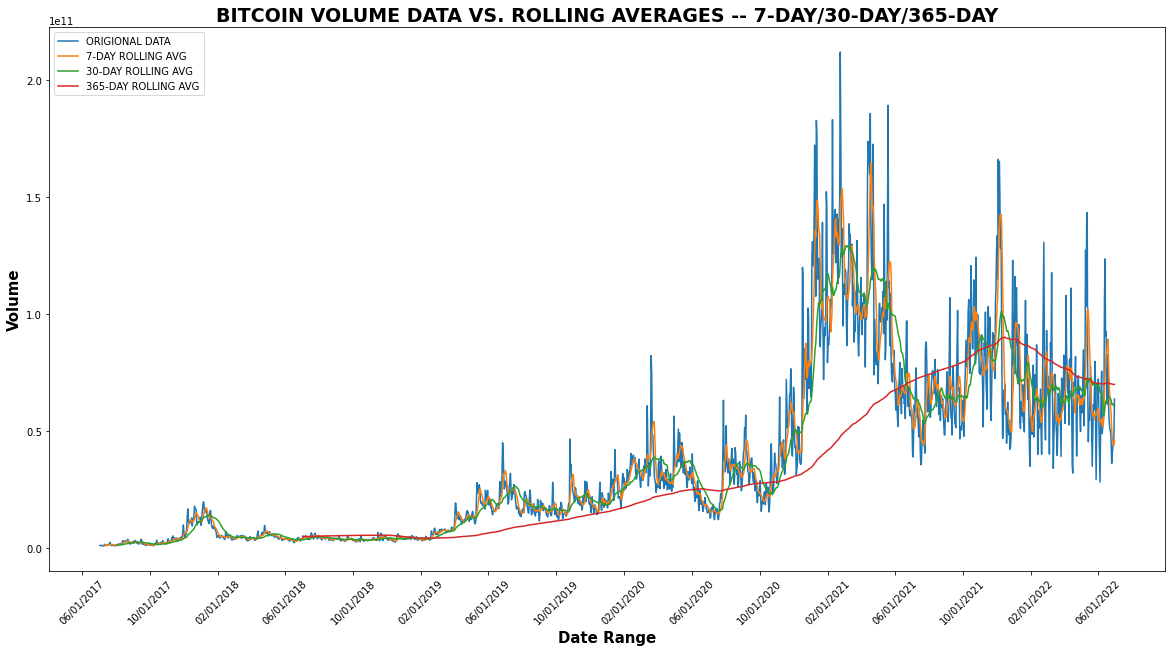

In [89]:
#Plotting the 7-day rolling average against the origional data

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
# plt.title("SCATTERPLOT OF DATA VS. ROLLING AVERAGE")
# plt.xlabel("Year-Month")
# plt.ylabel("Average Price")

# #s=20 to keep dots small in size
# plt.scatter(df_close.index, df_close['Close'], s=20)
# plt.scatter(df_close.index[7:], df_close['roll_avg'][7:], s=20);
# plt.figure(figsize=(20, 4))

# date_form = DateFormatter("%m/%d/%y")
# ax.xaxis.set_major_formatter(date_form)

ax.set_title("BITCOIN VOLUME DATA VS. ROLLING AVERAGES -- 7-DAY/30-DAY/365-DAY", fontweight="bold", fontsize=19)
ax.plot(df_volume.index,df_volume['Volume'], label='ORIGIONAL DATA')
ax.plot(df_volume.index[7:], df_volume['roll_avg_7'][7:], label='7-DAY ROLLING AVG');
ax.plot(df_volume.index[30:], df_volume['roll_avg_30'][30:], label='30-DAY ROLLING AVG');
ax.plot(df_volume.index[365:], df_volume['roll_avg_365'][365:], label='365-DAY ROLLING AVG');

ax.set_xlabel('Date Range', fontweight="bold", fontsize=15)
ax.set_ylabel("Volume", fontweight="bold",  fontsize=15)
ax.legend( loc='upper left')
# ax.set_xticks(df_close.index).set_major_locator(mdates.WeekdayLocator(interval=60))

date_form = DateFormatter("%m/%d/%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.xticks(rotation = 45)

plt.show()

In [51]:
df_market_cap = df[['Date','Market Cap']].copy()
df_market_cap['Date'] = pd.to_datetime(df_market_cap['Date'])
df_market_cap = df_market_cap.set_index('Date')

In [52]:
df_market_cap['roll_avg_7']   = df_market_cap['Market Cap'].rolling(window=7).mean()
df_market_cap['roll_avg_30']  = df_market_cap['Market Cap'].rolling(window=30).mean()
df_market_cap['roll_avg_365'] = df_market_cap['Market Cap'].rolling(window=365).mean()

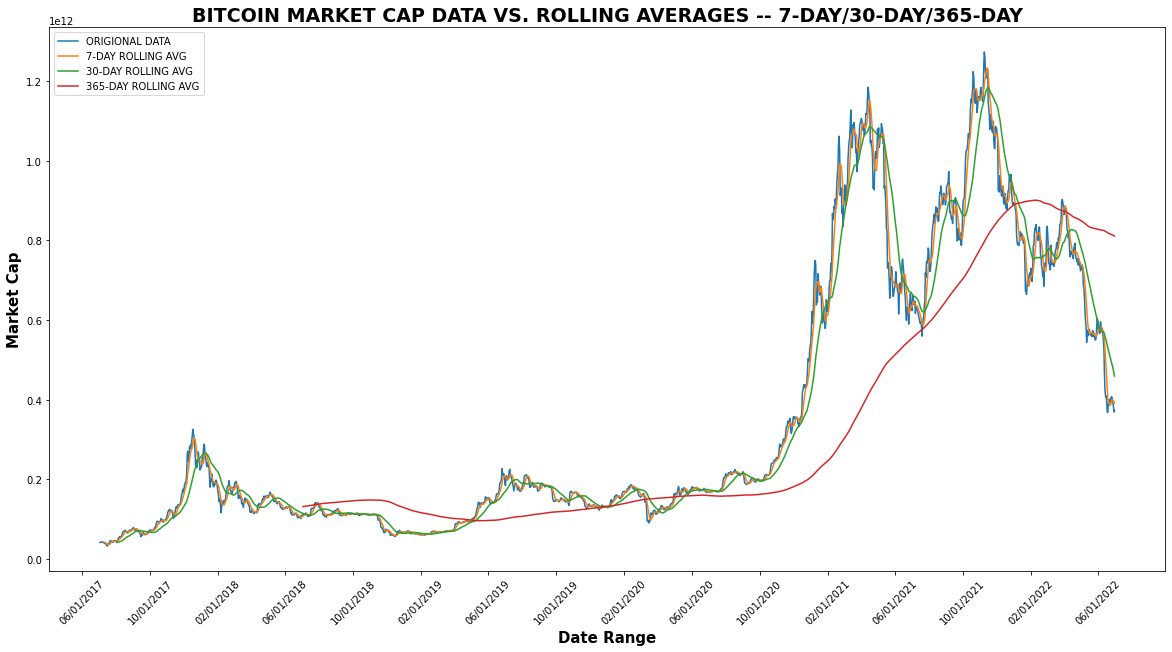

In [90]:
#Plotting the 7-day rolling average against the origional data

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
# plt.title("SCATTERPLOT OF DATA VS. ROLLING AVERAGE")
# plt.xlabel("Year-Month")
# plt.ylabel("Average Price")

# #s=20 to keep dots small in size
# plt.scatter(df_close.index, df_close['Close'], s=20)
# plt.scatter(df_close.index[7:], df_close['roll_avg'][7:], s=20);
# plt.figure(figsize=(20, 4))

# date_form = DateFormatter("%m/%d/%y")
# ax.xaxis.set_major_formatter(date_form)

ax.set_title("BITCOIN MARKET CAP DATA VS. ROLLING AVERAGES -- 7-DAY/30-DAY/365-DAY", fontweight="bold", fontsize=19)
ax.plot(df_market_cap.index,df_market_cap['Market Cap'], label='ORIGIONAL DATA')
ax.plot(df_market_cap.index[7:], df_market_cap['roll_avg_7'][7:], label='7-DAY ROLLING AVG');
ax.plot(df_market_cap.index[30:], df_market_cap['roll_avg_30'][30:], label='30-DAY ROLLING AVG');
ax.plot(df_market_cap.index[365:], df_market_cap['roll_avg_365'][365:], label='365-DAY ROLLING AVG');

ax.set_xlabel('Date Range', fontweight="bold", fontsize=15)
ax.set_ylabel("Market Cap", fontweight="bold",  fontsize=15)
ax.legend( loc='upper left')
# ax.set_xticks(df_close.index).set_major_locator(mdates.WeekdayLocator(interval=60))

date_form = DateFormatter("%m/%d/%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.xticks(rotation = 45)

plt.show()

In [54]:
# Initial test
dftest = adfuller(df_volume['Volume'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print()
print(dfoutput)

(-1.609966733198851, 0.478585182365467, 25, 1799, {'1%': -3.433990164137254, '5%': -2.8631479299063405, '10%': -2.567626009684832}, 88097.20919126114)

Test Statistic                   -1.609967
p-value                           0.478585
#Lags Used                       25.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64


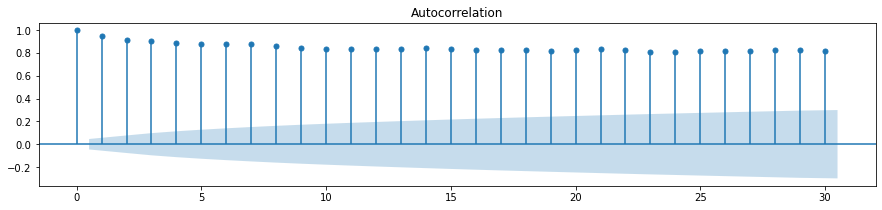

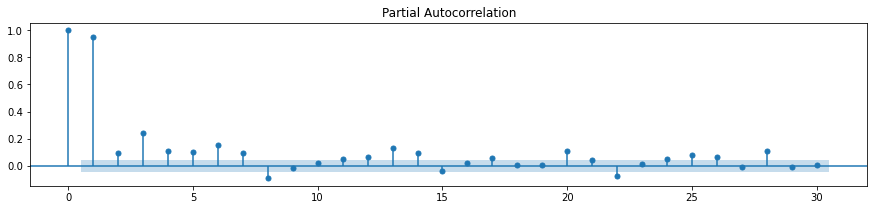

In [55]:
# ACF AND PACF

rcParams['figure.figsize'] = 15, 3
plot_acf(df_volume['Volume'], lags=30, alpha=0.05);

rcParams['figure.figsize'] = 15, 3
plot_pacf(df_volume['Volume'], lags=30, alpha=0.05);

In [81]:


# Instantiate & fit model with statsmodels
#p = num lags - ACF
p = 2

# q = lagged forecast errors - PACF
q = 4

#d = number of differences - will compare differenced data RMSE with this model to see if that is better prediction
# d=


# Fitting ARMA model and summary
ar = ARMA(df_volume['Volume'], (p,q), freq='D').fit()
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1825
Model:                     ARMA(2, 4)   Log Likelihood              -44715.530
Method:                       css-mle   S.D. of innovations    10576423149.718
Date:                Sun, 03 Jul 2022   AIC                          89447.060
Time:                        21:29:00   BIC                          89491.134
Sample:                    07-03-2017   HQIC                         89463.318
                         - 07-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.565e+10   1.98e+10      1.801      0.072   -3.14e+09    7.44e+10
ar.L1.Volume     1.8195      0.013    138.497      0.000       1.794       1.845
ar.L2.Volume    -0.8199      0.013    -62.562      0.000      -0.846      -0.794
ma.L1.Volume    -1.0542      0.027    -39.194      0.000      -1.107      -1.001
ma.L2.Volume    -0.1167      0.034     -3.469      0.001      -0.183      -0.051
ma.L3.Volume     0.1782      0.034      5.216      0.000       0.111       0.245
ma.L4.Volume     0.0287      0.023      1.236      0.216      -0.017       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           +0.0000j            1.0021            0.0000
AR.2            1.2172           +0.0000j            1.2172            0.0000
MA.1            1.0599           +0.0000j            1.0599            0.0000
MA.2            1.7206           +0.0000j            1.7206            0.0000
MA.3           -3.4461           +0.0000j            3.4461            0.5000
MA.4           -5.5465           +0.0000j            5.5465            0.5000
-----------------------------------------------------------------------------
"""

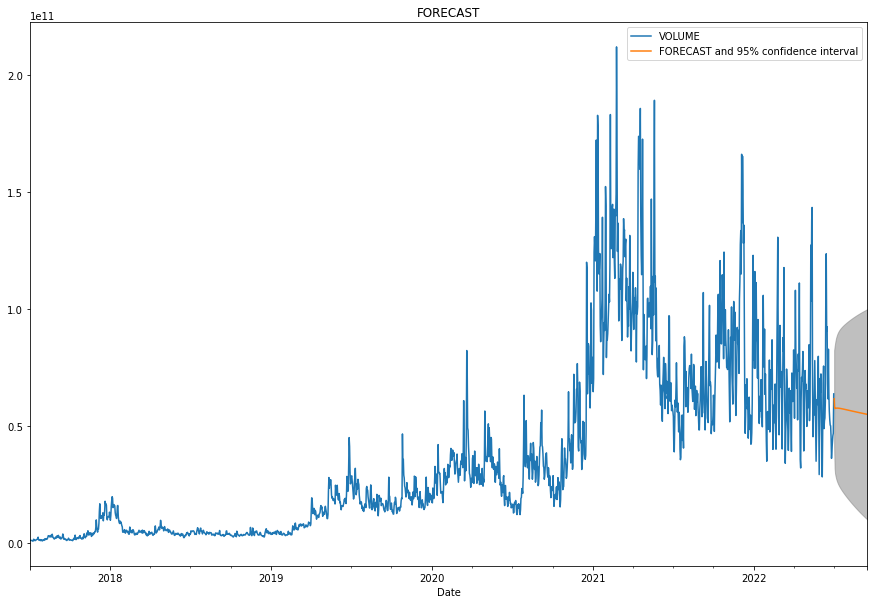

In [82]:
#plot of ARMA model
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
# ax = df_price_date['SALE_PRICE_LOGGED'].plot(ax=ax, title='FORECAST')
ax = df_volume['Volume'].plot(ax=ax, title='FORECAST',figsize=(15,10))
fig = ar.plot_predict(1825, 1900, dynamic=True, ax=ax, plot_insample=True)

handles, labels = ax.get_legend_handles_labels()
labels = ['VOLUME', 'FORECAST and 95% confidence interval']
ax.legend(handles, labels)

plt.show()

In [58]:
decomposition = seasonal_decompose(df_volume['Volume'], model='additive', period=7)
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [59]:
register_matplotlib_converters()

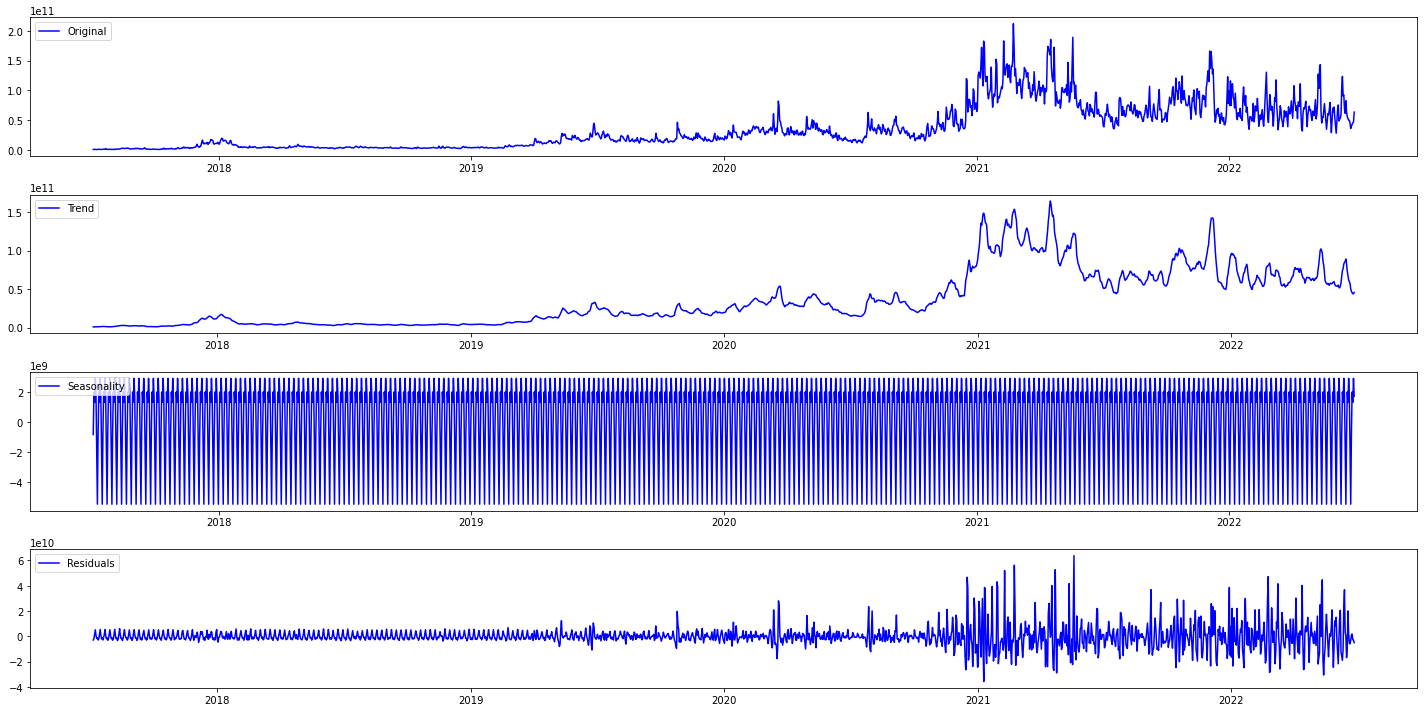

In [60]:


plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(observed, label='Original', color="blue")
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='upper left')
plt.tight_layout()



In [61]:
# Initial test
dftest = adfuller(df_market_cap['Market Cap'].dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print()
print(dfoutput)

(-1.432097884094153, 0.5667949669907424, 7, 1817, {'1%': -3.4339540519343137, '5%': -2.863131988080628, '10%': -2.5676175211639354}, 89534.71050355329)

Test Statistic                   -1.432098
p-value                           0.566795
#Lags Used                        7.000000
Number of Observations Used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


In [62]:
df_market_cap['Market_Cap_diff'] = df_market_cap['Market Cap'] - df_market_cap['Market Cap'].shift(1)

In [63]:
# Initial test
dftest = adfuller(df_market_cap['Market_Cap_diff'].dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print()
print(dfoutput)

(-15.078957572123894, 8.509380900086754e-28, 6, 1817, {'1%': -3.4339540519343137, '5%': -2.863131988080628, '10%': -2.5676175211639354}, 89485.99414207683)

Test Statistic                -1.507896e+01
p-value                        8.509381e-28
#Lags Used                     6.000000e+00
Number of Observations Used    1.817000e+03
Critical Value (1%)           -3.433954e+00
Critical Value (5%)           -2.863132e+00
Critical Value (10%)          -2.567618e+00
dtype: float64


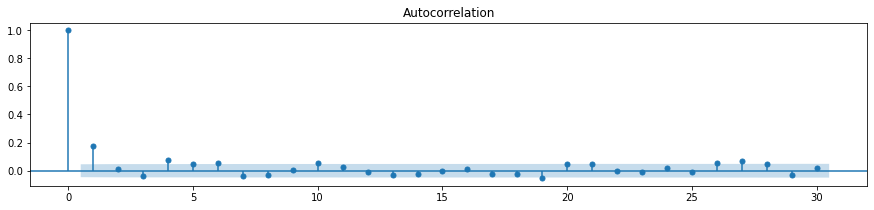

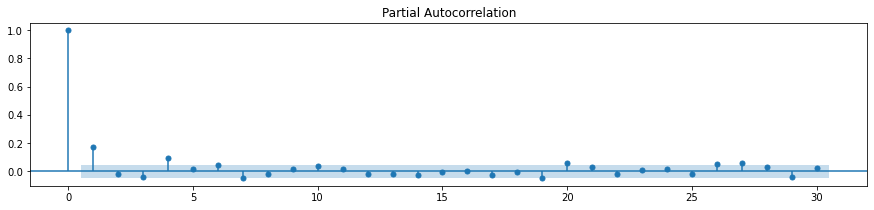

In [64]:
# ACF AND PACF

rcParams['figure.figsize'] = 15, 3
plot_acf(df_market_cap['Market_Cap_diff'].dropna(), lags=30, alpha=0.05);

rcParams['figure.figsize'] = 15, 3
plot_pacf(df_market_cap['Market_Cap_diff'].dropna(), lags=30, alpha=0.05);

In [65]:


# Instantiate & fit model with statsmodels
#p = num lags - ACF
p = 4

# q = lagged forecast errors - PACF
q = 4

#d = number of differences - will compare differenced data RMSE with this model to see if that is better prediction
# d=


# Fitting ARMA model and summary
ar = ARMA(df_market_cap['Market_Cap_diff'].dropna(), (p,q), freq='D').fit()
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Market_Cap_diff   No. Observations:                 1824
Model:                     ARMA(4, 4)   Log Likelihood              -45362.033
Method:                       css-mle   S.D. of innovations    15290728881.352
Date:                Sun, 03 Jul 2022   AIC                          90744.066
Time:                        21:21:14   BIC                          90799.154
Sample:                    07-04-2017   HQIC                         90764.388
                         - 07-01-2022                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.818e+08   4.34e+08      0.419      0.675   -6.68e+08    1.03e+09
ar.L1.Market_Cap_diff     0.1115      0.132      0.843      0.399      -0.148       0.371
ar.L2.Market_Cap_diff    -0.2932      0.132     -2.224      0.026      -0.552      -0.035
ar.L3.Market_Cap_diff    -0.7415      0.121     -6.123      0.000      -0.979      -0.504
ar.L4.Market_Cap_diff     0.1019      0.151      0.675      0.499      -0.194       0.398
ma.L1.Market_Cap_diff     0.0635      0.133      0.479      0.632      -0.196       0.323
ma.L2.Market_Cap_diff     0.3028      0.126      2.411      0.016       0.057       0.549
ma.L3.Market_Cap_diff     0.7430      0.112      6.607      0.000       0.523       0.963
ma.L4.Market_Cap_diff     0.0978      0.146      0.670      0.503      -0.188       0.384
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4205           -0.9348j            1.0250           -0.1827
AR.2            0.4205           +0.9348j            1.0250            0.1827
AR.3           -1.2201           -0.0000j            1.2201           -0.5000
AR.4            7.6525           -0.0000j            7.6525           -0.0000
MA.1            0.4428           -0.9360j            1.0355           -0.1797
MA.2            0.4428           +0.9360j            1.0355            0.1797
MA.3           -1.3340           -0.0000j            1.3340           -0.5000
MA.4           -7.1523           -0.0000j            7.1523           -0.5000
-----------------------------------------------------------------------------
"""

<Figure size 1440x720 with 0 Axes>

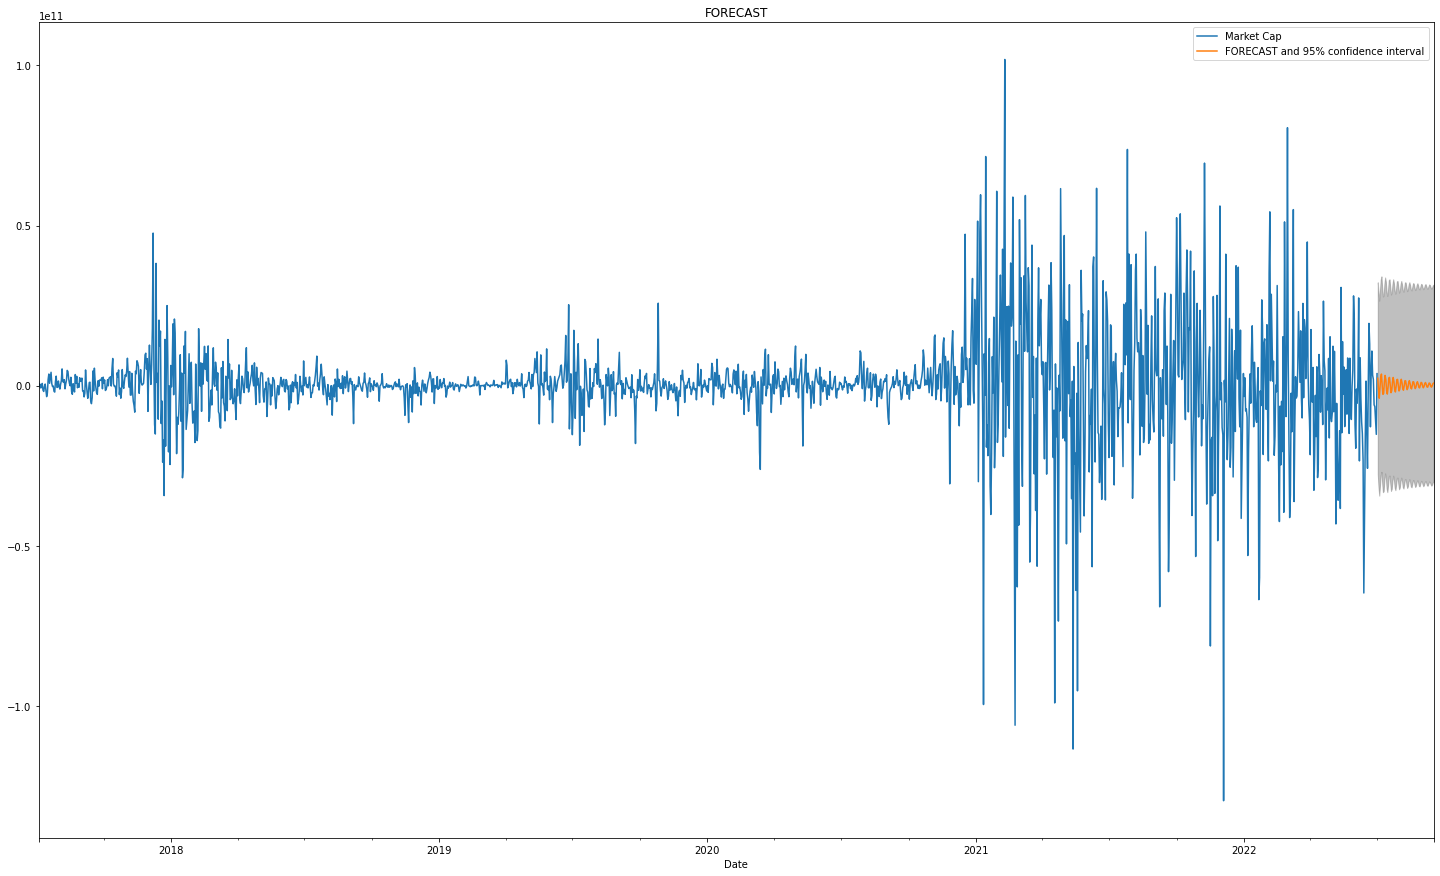

In [66]:
#plot of ARMA model
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
# ax = df_price_date['SALE_PRICE_LOGGED'].plot(ax=ax, title='FORECAST')
ax = df_market_cap['Market_Cap_diff'].dropna().plot(ax=ax, title='FORECAST',figsize=(25,15))
fig = ar.plot_predict(1824, 1900, dynamic=True, ax=ax, plot_insample=True)

handles, labels = ax.get_legend_handles_labels()
labels = ['Market Cap', 'FORECAST and 95% confidence interval']
ax.legend(handles, labels)

plt.show()